# Initial Value Problems

#### Learning outcomes

On successful completion of this page readers will be able to:

- Identity an initial value problem;
- Derive the Euler method and apply it to solve first-order ordinary differential equations;
- Express a higher-order ODE as a system of first-order ODEs;
- Apply an ODE solver to solve a system of ODEs.


An [**Initial Value Problem**](https://en.wikipedia.org/wiki/Initial_value_problem) (IVP) is written as an [Ordinary Differential Equation](https://en.wikipedia.org/wiki/Ordinary_dif) (ODE) where the initial solution at the lower boundary of the domain is known. For example,

```{math}
:label: IVP
y' = f(t, y), \qquad t \in [t_{\min}, t_{\max}], \qquad y(t_{\min}) = y_0.
```

Here a first-order ODE $y'=f(t,y)$ is defined over the domain $t\in [t_{\min}, t_{\max}]$ and the initial solution $y(t_{\min})$ is the known value $y_0$. 

In most real world practical applications, IVPs cannot be solved using analytical methods so instead we use computational methods called **ODE solvers** to approximate the solutions. The simplest ODE solver is the Euler method.

## The Taylor series
The [Taylor series](https://en.wikipedia.org/wiki/Taylor_series) is a series expansion that is the basis for all computational methods for solving ODEs. The Taylor series expansion of the function $f(t)$ evaluated at the point $a$ is 

```{math}
:label: Taylor_f(t)
f(a) = \sum_{n=0}^\infty \frac{f^{(n)}(a)}{n!}(t - a) = f(a) + f'(a)(t-a) + \frac{f''(a)}{2}(t-a) + \cdots,
```

where $f^{(n)}(a)$ denotes the $n$th derivative of $f$. Let $h = t - a$ be some small change in the value at which the function is evaluated (known as the **step length**) then

```{math}
:label: Taylor_no_error
f(t + h) = \sum_{n=0}^\infty \frac{h^n}{n!}f(t) = f(t) + hf'(t) + \frac{h^2}{2}f''(t) + \cdots.
```

It is impractical to sum the series to an infinite number of terms so we **truncate** equation {eq}`Taylor_no_error` so that only the first few terms are included, e.g.,

```{math}
:label: Taylor
f(t + h) = f(t) + hf'(t) + \frac{h^2}{2}f''(t) + \cdots + \frac{h^n}{n!}f^{(n)}(t) + O(h^{n+1}).
```

Since we are not including all terms in the truncated series we have introduced an error in the calculation of $f(t+h)$. This error is known as the **local truncation error**. We do not know the value of this truncation error but we do know that the error will be less than some function of $h$ and we represent this idea using the term $O(h^{n+1})$ which means *the truncation error will tend to zero at least as fast as $h^{n+1}$ tends to zero*. For example for $O(h^2)$ if $h$ is halved then the truncation error will decrease by a factor of at least $(\frac{1}{2})^2 = \frac{1}{4}$.  

## The Euler method
The [**Euler method**](https://en.wikipedia.org/wiki/Euler_method) is the simplest numerical method for computing the solution of a first-order Ordinary Differential Equation (ODE). Truncating the Taylor series, equation {eq}`Taylor`, after the first-order term we have

$$y(t+h) = y(t) + hy'(t) + O(h^2),$$

and introducing the notation $y_n = y(t_n)$ and $y_{n+1} = y(t_n + h)$ then

```{math}
:label: Euler
y_{n+1} = y_n + hf(t_n, y_n) + O(h^2),
```

which is the Euler method.

To apply the Euler method to solve equation {eq}`IVP` we initialise $t_0 = t_{\min}$ and $y_0 = y(t_{\min})$ and then apply equation {eq}`Euler` to calculate the values of $y_{n+1}$ and update $t_n$ using $t_{n+1} = t_n + h$ 

#### Example 1

Calculate the first two steps of the Euler method when used to solve the following IVP

$$ y' = \sin^2(t)y, \qquad t \in [0, 5], \qquad y(0) = 1,$$

using a step length $h=0.5$.

Since we have $t_0=0$ and $y_0=1$ then

$$
\begin{aligned}
    y_1 &= y_0 + h \sin^2(t_0)y_0 = 1 + 0.5\sin^2(0)(1) = 1, & t_1 &= t_0 + h = 0 + 0.5 = 0.5,\\
    y_2 &= y_1 + h \sin^2(t_1)y_1 = 1 + 0.5\sin^2(0.5)(1) = 1.1149, & t_2 &= t_1 + h = 0.5 + 0.5 = 1.0.
\end{aligned}
$$

#### Example 2

Calculate the solution of the IVP from example 1 over the whole domain $t\in [0,5]$ using the Euler method with a step length of $h=0.5$ and compare it to the exact solution given by

$$y = e^{(t - \sin(t)\cos(t))/2}$$

The functions below defines the right-hand side of the ODE and the exact solution to the IVP.

In [1]:
import numpy as np

def f(t, y):
    return np.sin(t)**2 * y

def exact_sol(t):
    return np.exp(0.5 * (t - np.sin(t) * np.cos(t)))

The code below defines a function called `euler` that solves an IVP using the Euler method. The input arguments are `f` is the name of the function the defines the ODE, `tspan` is a two-element array containing the lower and upper bounds of the $t$ domain, `y0` is the initial value of $y$ at the lower bound and `h` is the step length.
<a id="euler"></a>

In [2]:
def euler(f, tspan, y0, h):
    '''
    Calculuates the solution to an IVP using the Euler method
    '''
    # Initialise solution arrays
    nsteps = int((tspan[1] - tspan[0]) / h)
    t = np.zeros(nsteps + 1)
    y = np.zeros(nsteps + 1)
    t[0] = tspan[0]
    y[0] = y0

    # Solver loop
    for n in range(nsteps):
        y[n + 1] = y[n] + h * f(t[n], y[n])
        t[n + 1] = t[n] + h

    return t, y

The program below invokes the Euler method to solve this IVP.

 t    Euler   Exact
--------------------
0.00  1.0000  1.0000
0.50  1.0000  1.0404
1.00  1.1149  1.3135
1.50  1.5096  2.0436
2.00  2.2607  3.2845
2.50  3.1953  4.4359
3.00  3.7675  4.8059
3.50  3.8050  4.8830
4.00  4.0391  5.7699
4.50  5.1958  8.5589
5.00  7.6783 13.9573


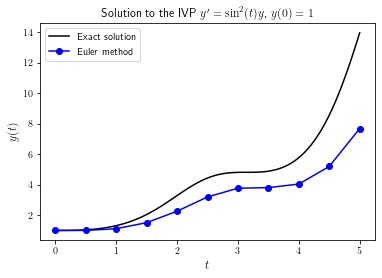

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import rc
rc('text', usetex=True)

# Define IVP parameters
tspan = [ 0, 5 ]
y0 = 1
h = 0.5

# Invoke the Euler method to solve the IVP
t, y = euler(f, tspan, y0, h)

# Output solution table
print(' t    Euler   Exact\n' + '-' * 20)
for n in range(len(t)):
    print('{:3.2f} {:7.4f} {:7.4f}'.format(t[n], y[n], exact_sol(t[n])))

# Plot numerical and exact solutions
fig, ax = plt.subplots()

t1 = np.linspace(tspan[0], tspan[1], 100)
ax.plot(t1, exact_sol(t1), 'k-', label='Exact solution')
ax.plot(t, y, 'bo-', label='Euler method')

ax.set_title("Solution to the IVP $y'=\sin^2(t)y$, $y(0) = 1$")
ax.set_xlabel('$t$', fontsize=12)
ax.set_ylabel('$y(t)$', fontsize=12)
ax.legend()

plt.show()

Here we can see that the solution using the Euler method deviates from the exact solution. This is because the Euler method is a first-order method and the truncation errors at each step accumulate as we step through the solution. One way to improve our solution is to use a smaller step length.


#### Example 3
Repeat the solution of the IVP in example 2 using a step length of $h=0.1$ and compare the solution with the exact solution and the one obtained using $h=0.5$.

 t    h=0.5   h=0.1   Exact
----------------------------
0.00  1.0000  1.0000  1.0000
0.50  1.0000  1.0291  1.0404
1.00  1.1149  1.2626  1.3135
1.50  1.5096  1.9018  2.0436
2.00  2.2607  3.0133  3.2845
2.50  3.1953  4.1223  4.4359
3.00  3.7675  4.5394  4.8059
3.50  3.8050  4.5919  4.8830
4.00  4.0391  5.2940  5.7699
4.50  5.1958  7.5957  8.5589
5.00  7.6783 12.1225 13.9573


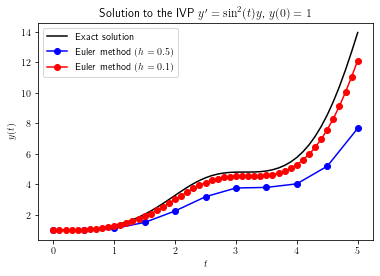

In [4]:
# Invoke the Euler method to solve IVP using a step length of h = 0.1
t1, y1 = euler(f, tspan, y0, 0.5)
t2, y2 = euler(f, tspan, y0, 0.1)

# Output solution table
print(' t    h=0.5   h=0.1   Exact\n' + '-' * 28)
for n in range(len(t)):
    print('{:3.2f} {:7.4f} {:7.4f} {:7.4f}'\
          .format(t1[n], y1[n], y2[5 * n], exact_sol(t[n])))

# Plot numerical and exact solutions
fig, ax = plt.subplots()

ax.plot(t2, exact_sol(t2), 'k-', label='Exact solution')
ax.plot(t1, y1, 'bo-', label='Euler method $(h=0.5)$')
ax.plot(t2, y2, 'ro-', label='Euler method $(h=0.1)$')

ax.set_title("Solution to the IVP $y'=\sin^2(t)y$, $y(0) = 1$")
ax.set_xlabel('$t$')
ax.set_ylabel('$y(t)$')
ax.legend()

plt.show()

Here we can see that although using a smaller step length has increased the accuracy of the solution it still does not match the exact solution. The Euler method is easy to derive and apply but is not very accurate. 

The derivation of more accurate methods is covered in Runge-Kutta methods.

---
## Solving higher-order ordinary differential equations

The numerical methods that are applied to calculate the solutions to ODEs can only be applied to first-order ODEs. To apply them to higher-order ODEs we first need to rewrite them as a system of first-order ODEs.

Consider the $N$th-order ODE 

$$y^{(N)} = f(t, y, y', y'', \ldots, y^{(N-1)}).$$

If we let $y_1=y$, $y_2 = y'$, $y_3 = y''$ and so on up to $y_N = y^{(N-1)}$ then we have

$$
\begin{aligned}
    y_1' &= y_2, \\
    y_2' &= y_3, \\
    & \vdots \\
    y_N' &= f(t, y_1, y_2, y_3, \ldots , y_N).
\end{aligned}
$$

This is a system of $N$ first-order ODEs. We can apply our numerical methods for solving ODEs to each equation in the system to give an equivalent solution to the $n$th-order ODE.

#### Example 4

Rewrite the following third-order ODE as a system of three first-order ODEs.

$$ y''' + yy'' - 2y' + tyy'' - 10 = 0$$

Let $y_1 = y$, $y_2 = y'$, $y_3 = y''$ then we can rewrite this ODE using

$$
\begin{aligned}
    y_1' &= y_2, \\
    y_2' &= y_3, \\
    y_3' &= -y_1y_3 + 2y_2 - ty_1y_2 + 10.
\end{aligned}
$$

### Solving systems of ordinary differential equations

Consider a system of $N$ first-order ODEs is written in the form

$$
\begin{aligned}
    y_1' &= f_1(t, y_1), \\
    y_2' &= f_2(t, y_2), \\
    & \vdots \\
    y_N' &= f_N(t, y_N).
\end{aligned}
$$

Let $\mathbf{y} = \pmatrix{y_1 \\ y_2 \\ \vdots \\ y_N}$ and $F(t, \mathbf{y}) = \pmatrix{f_1(t, y_1) \\ f_2(t, y_2) \\ \vdots \\ f_N(t, y_N)}$ then we can write the system in vector form

$$\mathbf{y}' = F(t, \mathbf{y}).$$

Therefore Euler method for solving this ODE in vector form is

$$ \mathbf{y}_{n+1} = \mathbf{y}_n + hF(t, \mathbf{y}) + O(h^2).$$

#### Example 5

Calculate two steps of the Euler method used to solve the following IVP

$$
    y'' + y = 0, \qquad t \in[0, 10], \qquad y(0) = 2, \qquad y'(0) = 0.
$$

using a step length of $h=0.1$.

First we need to rewrite the second-order ODE as two first-order ODEs. Let $y_1=y$ and $y_2=y'$ then

$$
\begin{aligned}
    y_1' &= y_2, & y_1(0) = 2,\\
    y_2' &= -y_1, & y_2(0) = 0,
\end{aligned}
$$

and we have

$$
\begin{aligned}
    \mathbf{y} &= \pmatrix{y_1 \\ y_2}, &
    F(t, \mathbf{y}) &= \pmatrix{ y_2 \\ -y_1}.
\end{aligned}
$$

Calculating the first two steps of the Euler method:

$$
\begin{aligned}
    \mathbf{y}_1 &= \mathbf{y}_0 + hF(t_0, \mathbf{y}_0)
    = \pmatrix{2 \\ 0} + 0.1 \pmatrix{ 0 \\ -2 }
    = \pmatrix{2 \\ -0.2}, \\
    \mathbf{y}_2 &= \mathbf{y}_1 + hF(t_1, \mathbf{y}_1) 
    = \pmatrix{2 \\ -0.2} + 0.1 \pmatrix{-0.2 \\ -2} 
    = \pmatrix{1.98 \\ -0.4}.
\end{aligned}
$$

#### Example 6

Calculate the solution of the IVP from example 5 over the whole domain $t\in [0,10]$ using the Euler method with a step length of $h=0.1$ and compare it to the exact solution given by

$$y = 2\cos(t).$$

The functions below defines the right-hand side of the ODE and the exact solution to the IVP.

In [5]:
def f(t, y):
    dy = np.zeros(y.shape)
    dy[0] = y[1]
    dy[1] = -y[0]
    return dy

def exact_sol(t):
    return 2 * np.cos(t)

The code below defines a function called `euler2` that solves an IVP defined using a system of ODEs. This is very similar to the [`euler`](#euler) function defined earlier with the exception that the `y` array has $N$ columns instead of just 1.

In [6]:
def euler2(f, tspan, y0, h):
    '''
    Calculates the solution to an IVP expressed using a system
    of ODEs using the Euler method
    '''
    # Initialise solution arrays
    nsteps = int((tspan[1] - tspan[0]) / h)
    t = np.zeros(nsteps + 1)
    y = np.zeros((nsteps + 1, len(y0)))
    t[0] = tspan[0]
    y[0, :] = y0

    # Solver loop
    for n in range(nsteps):
        y[n + 1, :] = y[n, :] + h * f(t[n], y[n, :])
        t[n + 1] = t[n] + h

    return t, y

The program below invokes the Euler method to solve this IVP.

  t     Euler    Exact
-----------------------
 0.00   2.0000   2.0000
 0.50   1.8010   1.7552
 1.00   1.1416   1.0806
 1.50   0.1631   0.1415
 2.00  -0.9060  -0.8323
 2.50  -1.8032  -1.6023
 3.00  -2.2953  -1.9800
 3.50  -2.2387  -1.8729
 4.00  -1.6195  -1.3073
 4.50  -0.5638  -0.4216
 5.00   0.6867   0.5673
 5.50   1.8293   1.4173
 6.00   2.5728   1.9203
 6.50   2.7111   1.9532
 7.00   2.1786   1.5078
 7.50   1.0742   0.6933
 8.00  -0.3550  -0.2910
 8.50  -1.7684  -1.2040
 9.00  -2.8118  -1.8223
 9.50  -3.2054  -1.9943
10.00  -2.8177  -1.6781


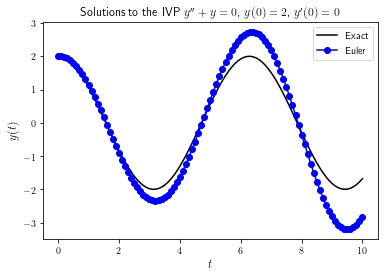

In [7]:
# Define IVP parameters
tspan = [0, 10]
y0 = [2, 0]
h = 0.1

# Solve IVP using the Euler method
t, y = euler2(f, tspan, y0, h)

# Output solution table
print('  t     Euler    Exact\n' + '-' * 23)
for n in range(0, len(t), 5):
    print('{:5.2f} {:8.4f} {:8.4f}'.format(t[n], y[n,0], exact_sol(t[n])))

# Plot solution
fig, ax = plt.subplots()

ax.plot(t, exact_sol(t), 'k-', label='Exact')
ax.plot(t, y[:,0], 'bo-', label='Euler')
ax.set_title("Solutions to the IVP $y''+y=0$, $y(0)=2$, $y'(0)=0$")
ax.set_xlabel('$t$', fontsize=12)
ax.set_ylabel('$y(t)$', fontsize=12)
ax.legend()

plt.show()

Here we can see that the Euler method solution is deviating away from the exact solution. Once again this is a result of the lower order accuracy of the Euler method.

---
## Summary

- An initial value problem is expressed as an ODE where the solution at the lower bound of the domain is known.
- The Euler method is derived by truncating the Taylor series after the first-order term. It advances the solution over a small step of length $h$ using known values of $t_n$ and $y_n$ to calculate the solution at $y_{n+1}=y(t_n + h)$.
- The Euler method is only first-order accurate so the solutions tend to be inaccurate unless using a very small value of $h$.
- Higher-order ODEs can be rewritten as systems of first-order ODEs which can be solved using numerical solvers.

---
## Exercises

1. Using a pen and calculator (i.e., not Python), solve the following IVP using the Euler method with step length $h=0.4$. Write down your solution correct to 4 decimal places

    $$y' = ty, \qquad t \in [0, 2], \qquad y(0) = 1.$$

2. Reproduce your solutions to question 1 using Python.

3. The exact solution to the IVP in question 1 is $y=e^{t^2/2}$. Produce a plot of the Euler solution from question 2 and the exact solution on the same set of axes.